#Metodo de Euler con Python

## Introducción

### Historia

En general, se llaman numéricos aquellos métodos que permiten obtener, aunque sea con carácter aproximado, la solución de
un problema matemático mediante el uso de un número finito y practicable de operaciones aritméticas: sumas, restas, multiplicaciones y
divisiones. En el estudio de los métodos numéricos entran en consideración tanto la mejor o peor aproximación de la solución calculada,
como el mayor o menor coste del cálculo.
En el caso de las ecuaciones diferenciales ordinarias, los métodos
numéricos pueden presumir de una genealogía muy distinguida. El
primero y más simple fue introducido por Euler en 1768 (Institutionum Calculi Integralis, Volumen Primum); aún se emplea en algunos
casos y juega todavía un papel destacado en la didáctica del Análisis
Numérico.9
 Puede describirse, como es bien sabido, como el reemplazamiento de la solución por una poligonal, o, alternativamente,
como la substitución del verdadero incremento que media entre el
estado presente de la solución y el estado futuro por el incremento
aproximado correspondiente a la recta tangente (desarrollo de Taylor
de primer orden).

### Explicación del Método

- Es un metodo númerico que mediante aproximaciones en intervalos se va generando una funcion por la union de sus puntos.
- Tenemos que tener los extremos del dominio a evaluar $[a, b]$ y tambien el valor de $Y{(0)}$.
- Siendo $n$ el número de intervalos, entonces la variación de x por cada intervalo es $ h = (b-a)/n$.<br>
- Entonces x va variando de la forma:$X_{n} = X_{n-1} + h$ <br>
- En $y$ la funcion varia de la forma: $Y_{n} = Y_{n-1} + h*Y{'}$

## Planteamiento del Problema

> La tasa de crecimiento de una determinada
población de bacterias es directamente proporcional al número de bacterias existentes. Se
realiza un cultivo en laboratorio, introduciendo 2.5 millones de bacterias en un recipiente.Con una constante de proporcionalidad de 0.231. Calcular la población existente al cabo de 11 horas.

> Primero plantearemos el modelo matematico, en este caso se menciona que el crecimiento es directamente proporcional a la población existente, entonces:
> - $\frac{dP(t)}{dt} = 0,231P(t)$

> Las condiciones iniciales dadas son:
  - $P(0) = 2.5 $ millones

> Nos piden hallar $P(11)$

## Resolución del Problema

### Solución manual

> Luego por variables separables:
  - $\frac{dP(t)}{P(t)} = 0,231dt$

> Integramos:
  - $\int\frac{dP(t)}{P(t)} = 0,231\int dt$

> Resultado de integrar:
  - $Ln(P(t)) = 0.231 t + C_{1}$

> La solución de la EDO de primer orden es:
  - $ P(t) = C e^{0.231t}$ 

> Luego hallando la sución particular:
>  - Para $P(0) = 2.5$<br>
    $ P(0) = 2.5 = C e^{0.231(0)}$ <br>
    $ -> C = 2.5$

> La solución particular es:<br>
  $P(t) = 2.5 e^{0.231 t}$

> Hallando P(11):
  $ P(11) = 2.5 e^{0.231*11} = 31.75$

### Solución por el Método de Euler Implementado en Python

- Como premiza tenemos que la ecuación diferencial es:
  - $\frac{dP(t)}{P(t)} = 0.231 P(t)$

#### Proyecto

- Importamos las librerias en el proyecto

In [ ]:
# Hacemos uso de pyplot de la libreria matplotlib
from matplotlib import pyplot as plt
# Importamon numpy para la grafica real de e^x
import numpy as np
import math
import sympy
from IPython.display import display, Markdown

- Inicializamos los parámetros:
  - y0: $y(0)$
  - a: Extremo inferior del domínio
  - b: Extremo superior del domínio 
  - k: Numero de intervalos para evaluar

In [ ]:
# Parametros de ka función: valores extremos -> [a,b] , cantidad de intervalos -> N, Valor Y(0)
# Datos iniciales               
y0= 2.5                                # Valor inicial en 'y'
a = 0                               # Extremo inferior sobre 'x'
b = 11                               # Extremo superior sobre 'x'
k = 100                             # Número de intervalos

- Resolvemos la ecuación con sympy

Solucion: $\frac{d}{d t} P{\left (t \right )} = 0.231 P{\left (t \right )}$

Solucion Particular: $P{\left (t \right )} = C_{1} e^{0.231 t}$

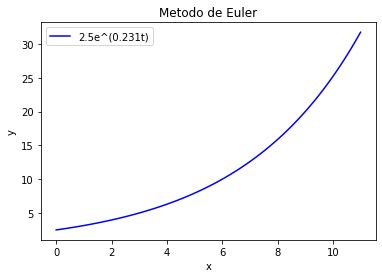

In [ ]:
# Para mostral resultado
t = sympy.Symbol('t')
p = sympy.Function('P')
# expreso la ecuacion
f_sym = 0.231 * (p(t))

# Ecuacion
eq = sympy.Eq(p(t).diff(t), f_sym)
display(
    Markdown(
        'Solucion: {}'.format(sympy.latex(eq, mode='inline'))
    )
)
# Añadiendo condiciones iniciales
IC = {p(0): 2.5}
# Resolviendo la ecuación
sol = sympy.dsolve(eq,p(t), ics=IC)
display(
    Markdown(
        'Solucion Particular: {}'.format(sympy.latex(sol, mode='inline'))
    )
)
# Graficando a P(t)
X = np.linspace(a, b, 100, endpoint=True)
Y = 2.5*np.exp(0.231*X) # P(t) = 2.5*e^(0.231*t)
plt.plot(X, Y, color="blue", linestyle="-",label="2.5e^(0.231t)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Metodo de Euler')
plt.legend(loc='upper left')

- Definimos una funcion con la retornando el resultado de evaluar x y y en la EDO

In [ ]:
def y_derivada(x, y):
  f = 0.231*y
  return f

- Definimos el metodo de Euler en dos funciones:
  - La variacion de x: var_x(a, b, n)
  - La variacion de y: var_y(a, b, n,y0)

In [ ]:
# Variación en X para euler
def var_x(a,b,n):
  x = [a]
  h = (b-a)/n
  for k in range(n):
    x.append(x[k] + h)
  return x

# Variacion en Y para euler 
def var_y(a,b,n, y0):
  x = var_x(a,b,n)
  y = [y0]
  h = (b-a)/n
  for k in range(n):
    # Implementamos el metodo de Euler
    y.append(y[k] + h * y_derivada(x[k], y[k]))
  return y

- Graficamos mediante el metodo de euler

In [ ]:
for n in range(1,k):
  # Hallamos los valores de X y Y para esos valores iniciales
  x = var_x(a,b,n)
  y = var_y(a,b,n,y0)
  ## Asignamos los valores
  lb = "Metodo de euler(n="+ str(n) + ")(y(11)=" + "{0:.4f}".format(y[-1]) + ")" 
  plt.plot(x,y, color="red", linestyle="-",label=lb)

  # Comparando con grafica real
  X = np.linspace(a, b, 100, endpoint=True)
  Y = 2.5*np.exp(0.231*X) # P(t) = 2.5*e^(0.231*t)
  plt.plot(X, Y, color="blue", linestyle="-",label="Sin metodo de euler")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Metodo de Euler')
  plt.legend(loc='upper left')
  plt.show()

## Conclusiones

>Como vemos, al llegar a la aproximación n=99 el valor de P(11) es igual a 30.7297 , mientras que en la solución particular P(11) llega a ser igual a 31.730. Este “error” es debido a que el Método de Euler aproxima la función solución por medio de una línea poligonal. Por lo tanto la aproximación será peor mientras más alejados estemos de su punto inicial. Y el error será más evidente mientras mayor sea el valor de h.


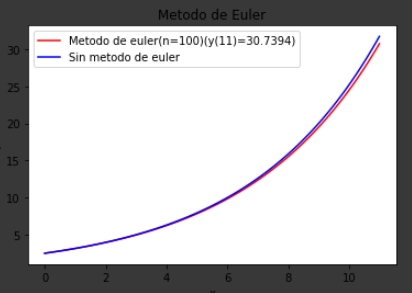

>Sin embargo , este “error” nos sirve para poder seguir y repetir el proceso anterior y generar nuevas aproximaciones que estén más cerca al valor real. A eso agregarle que el número h que colocamos (número de cálculos) es un valor finito , agrega un error extra (Error de Redondeo)